# CS638 Vision Zero Madison

### Author: Clarence (Ming Hsuan), Kuo
#### Group: 2


## Scratch Work

### Fisrt Question: What can be the major factor that makes car crash happen?

### Potential factors:
- Weather Conditions ex: Snow, Rain, Hot day etc
- School season ex: Summer/Winter break, Fall/Spring semester
- Government Policy ex: Drunk and drive policy

#### Background found by my teammates

1. Most of the accidents are labeled "Property Damaged", which are minor accidents.
2. If catogorizing the data into intersect and non-intersect, the split is 55%/45%.

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from collections import deque

# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')
df['ACCDDATE'] = pd.to_datetime(df['ACCDDATE'])

In [5]:
inj = df[df["ACCDTYPE"] == "BIKE"]

In [6]:
inj

,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,ONHWY,...,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG
1348,9BGG3T2,2010-09-22,15,SW,DANE,MADISON,C,12.0,E,12,...,0.0,47.0,M,C,NaN,NaN,,,43.033278,-89.407738
1475,9BL0RRV,2012-01-09,10,SW,DANE,MADISON,C,12.0,E,12,...,15.0,53.0,M,,HLMT,NaN,,,43.033609,-89.407500
1485,9BFSV9J,2011-05-13,22,SW,DANE,MADISON,C,12.0,E,NaN,...,30.0,41.0,M,B,NONE,FTY,346.37 1 C 3,,43.033609,-89.407500
1753,9BBVPQD,2011-06-25,21,SW,DANE,MADISON,C,12.0,E,12,...,30.0,23.0,F,,EYE,NaN,,,43.039670,-89.378781
2158,9BD8644,2014-07-15,7,SW,DANE,MADISON,C,12.0,E,12,...,77.0,25.0,M,B,HLMT,NaN,,,43.045449,-89.306499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53706,A024348,2009-08-26,23,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,29.0,M,B,NONE,NaN,,,43.092039,-89.355198
53739,01L091L4FS,2017-08-07,9,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,41.0,F,,SH/LP,NaN,NaN,NaN,43.088443,-89.357984
53778,01L0GMH5JZ,2018-09-03,14,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,40.0,M,B,NaN,NaN,NaN,NaN,43.091083,-89.355932
54063,9B6T74R,2015-08-21,7,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,20.0,F,B,NaN,NaN,,,43.146176,-89.371107


##### Preparing data

Get month and year bin

In [2]:
dftime= pd.to_datetime(df["ACCDDATE"])
df["ACCDMONTH"] = ""
df["ACCDYEAR"] = ""
for i in range(len(dftime)):
    #get month bin
    df["ACCDMONTH"][i] = dftime[i].month
    if dftime[i].year != 2019:
        #get year bin
        df["ACCDYEAR"][i] = dftime[i].year
    else:
        df["ACCDYEAR"][i] = None


In [3]:
# Create fatal case data
df["FATALFLAG"] = ""
df["INJFLAG"] = ""
df["FLAG"] = ""
for i in range(len(df["ACCDSVR"])):
    #print(df["ACCDSVR"][i])
    if df["ACCDSVR"][i] == 'FAT':
        df["FATALFLAG"][i] = 'FAT'
        df["FLAG"][i] = True
        df["INJFLAG"][i] = None
    elif df["ACCDSVR"][i] == 'INJ':
        df["INJFLAG"][i] = 'INJ'
        df["FATALFLAG"][i] = None
        df["FLAG"][i] = True
    else:
        df["FATALFLAG"][i] = None
        df["INJFLAG"][i] = None
        df["INJFLAG"] = None

In [6]:
# Create fatal case data
df["SUMMERFATALFLAG"] = ""
df["SUMMERINJFLAG"] = ""
df["SUMMER"] = ""
SUM_FAT = 0
SUM_INJ = 0
for i in range(len(dftime)):
    if 5 < dftime[i].month < 10:
        if df["FATALFLAG"][i] != None:
            df["SUMMERFATALFLAG"][i] = "FAT"
            df["SUMMER"][i] = "FAT"
            SUM_FAT += 1
        else:
            df["SUMMERFATALFLAG"][i] = None
            df["SUMMER"][i] = None
            
        if df["INJFLAG"][i] != None:
            df["SUMMERINJFLAG"][i] = "INJ"
            df["SUMMER"][i] = "INJ"
            SUM_INJ += 1
        else:
            df["SUMMERINJFLAG"][i] = None
            
        if df["INJFLAG"][i] == None and df["FATALFLAG"][i] == None:
            df["SUMMER"][i] = None
    else:
        df["SUMMERFATALFLAG"][i] = None
        df["SUMMERINJFLAG"][i] = None
        df["SUMMER"][i] = None


## <a style="color:blue">Previous Work: 10/03</a>

### Distribution plot
- plot according to monthly accident count.
- Lines are seperated by year to check if the trend of accident migrates.


### Observations

- There is a fairly clear trend that the period from **November to January** is a high season for accidents and **March to May** is the relatively low season.

- The monthly count start to raise again in **June**. 

- For **2017 and 2018**, the curve somehow become more smoothed.

### Sub-conclusion

- The high season match the Winter time in Madison.

- The raise in June is interesting because most students may have left school, the number of pedestian should be lower.

- There could be some other regulation happened in 2016 that changed the pattern of 2017 and 2018


## <a style="color:blue">Previous Work: 10/03</a>

### Next Question: When did most INJURY and FATAL cases happened?

Our main goal is to reduce the injury or death from car accidents, so we focus on the INJURY and FATAL INJURY cases and try to find characteristics or patterns from them.

### Severity Distribution
- To answer the question raised above, I first plot the distribution of FATAL and INJURY cases over month.

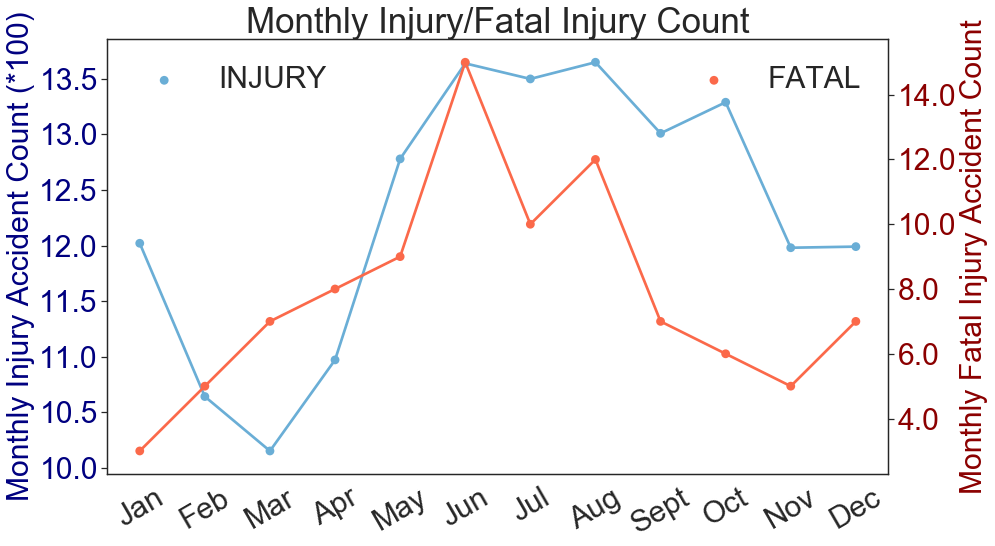

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 8))
fontSize = 30
labelSize = fontSize + 3
titleSize = fontSize + 5
ax2 = ax1.twinx()
ACCDMONTH_INJURYFLAG = df.groupby(['ACCDMONTH',"INJFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
ACCDMONTH_FATALFLAG = df.groupby(['ACCDMONTH',"FATALFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
ACCDMONTH_INJURYFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='INJFLAG', data=ACCDMONTH_INJURYFLAG, palette = "Blues",capsize=0.1, ax = ax1)
ACCDMONTH_FATALFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='FATALFLAG', data=ACCDMONTH_FATALFLAG, palette = 'Reds',capsize=0.1, ax = ax2)

# set left legend
ACCDMONTH_INJURYFLAG_LEG = ACCDMONTH_INJURYFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_INJURYFLAG_POINTPLOT.legend(ACCDMONTH_INJURYFLAG_LEG, ["INJURY"], frameon = False, title='',fontsize = fontSize,loc='upper left')

# set right legend
ACCDMONTH_FATALFLAG_LEG = ACCDMONTH_FATALFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_FATALFLAG_POINTPLOT.legend(ACCDMONTH_FATALFLAG_LEG, ["FATAL"], frameon = False, title='',fontsize = fontSize,loc='upper right')


# set left axis 
ACCDMONTH_INJURYFLAG_POINTPLOT.set_title('Monthly Injury/Fatal Injury Count', fontsize = titleSize)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xlabel('', fontsize = labelSize)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_ylabel('Monthly Injury Accident Count (*100)', fontsize = fontSize,color = "navy")
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
ACCDMONTH_INJURYFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize, color = "navy")

#set right axis
ACCDMONTH_FATALFLAG_POINTPLOT.set_ylabel('Monthly Fatal Injury Accident Count', fontsize = fontSize,color = "darkred")
ticks = ACCDMONTH_FATALFLAG_POINTPLOT.get_yticks()
ACCDMONTH_FATALFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize,color = "darkred")

# set up x,y tick labels
month_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
axes = ACCDMONTH_INJURYFLAG_POINTPLOT.axes
plt.savefig("InjFatByMonth.png")

## <a style="color:blue">Previous Work: 10/10</a>

### Question raised
It is counter-intuitive that the total accident count during summer dropped while the injury/ fatal injury count raised

### Accident Count from May to October

I collected data from Mat to October and check the following feature of the accident:
1. Location 
2. Day time



### Takeaway
1. Both distributions of selected catagory during May to October are the same as our previous finding. 
2. We can conclude that it is not intersections that result in more frequent rate.


##  <a style="color:blue">Previous Work: 10/10</a>

### Time in day V.S. Selected Period
All the data in both line are normalized to ratio by: x = Count/Total * 100%


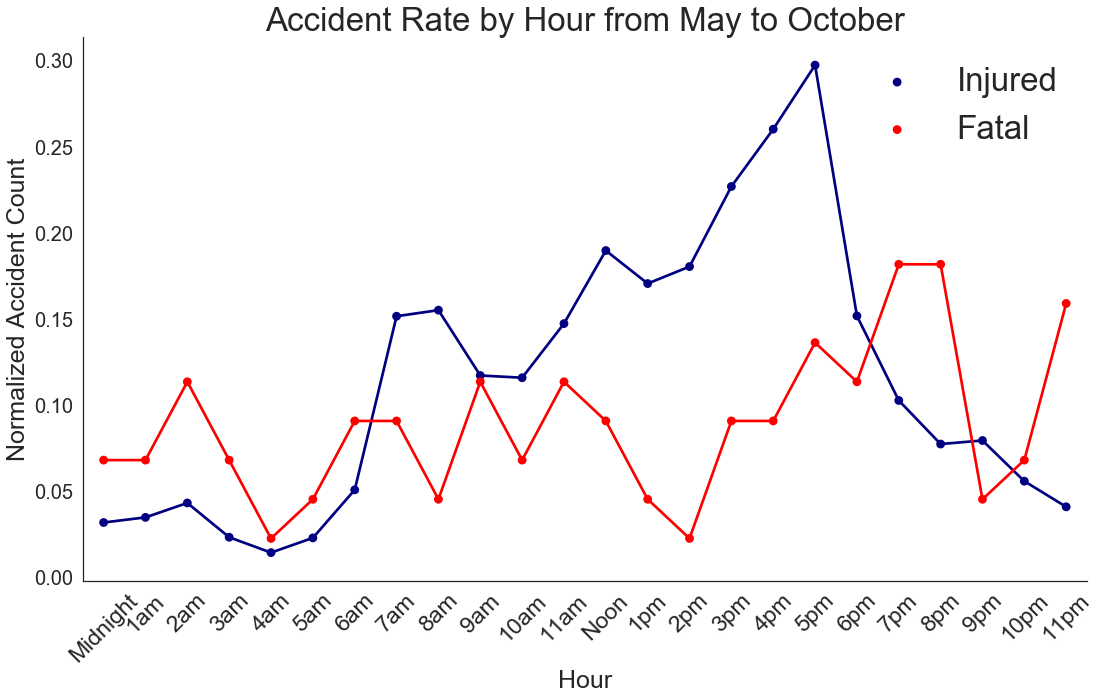

<Figure size 1080x576 with 0 Axes>

In [8]:
sns.set(style="white")
df['ACCDDATE'] = pd.to_datetime(df['ACCDDATE'])
NTFYHOUR_INJFLAG = df.groupby(['NTFYHOUR', 'INJFLAG']).count()['DOCTNMBR'].reset_index()
NTFYHOUR_INJFLAG["DOCTNMBR"] = NTFYHOUR_INJFLAG["DOCTNMBR"]/SUM_INJ
NTFYHOUR_FATALFLAG = df.groupby(['NTFYHOUR', 'FATALFLAG']).count()['DOCTNMBR'].reset_index()
NTFYHOUR_FATALFLAG["DOCTNMBR"] = NTFYHOUR_FATALFLAG["DOCTNMBR"]/SUM_FAT

fig, ax1 = plt.subplots(figsize=(18, 10))
plt.figure(figsize = (15,8))
leftColor = ["navy"]
rightColor = ["Red"] 
titleSize = 20

NTFYHOUR_INJFLAG_PLOT = sns.pointplot(x = 'NTFYHOUR', y = 'DOCTNMBR', hue = 'INJFLAG', data = NTFYHOUR_INJFLAG, ax = ax1, palette = leftColor)
NTFYHOUR_FATALFLAG_PLOT = sns.pointplot(x = 'NTFYHOUR', y = 'DOCTNMBR', hue = 'FATALFLAG', data = NTFYHOUR_FATALFLAG, ax = ax1, palette = rightColor)
NTFYHOUR_FATALFLAG_PLOT.set_xticks(list(range(24)))
NTFYHOUR_FATALFLAG_PLOT.set_xticklabels(['Midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', 
                              '11am', 'Noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', 
                              '11pm'], fontsize = labelSize - 10, rotation = 45)
NTFYHOUR_FATALFLAG_PLOT.yaxis.set_ticks(np.arange(0, 0.35, 0.05))
ax1.tick_params(axis="y", labelsize = 20)
NTFYHOUR_FATALFLAG_LEG = NTFYHOUR_FATALFLAG_PLOT.get_legend_handles_labels()[0]
NTFYHOUR_FATALFLAG_PLOT.legend(NTFYHOUR_FATALFLAG_LEG, ['Injured','Fatal'], title='', frameon = False, loc='upper right',fontsize = labelSize)
NTFYHOUR_FATALFLAG_PLOT.set_title('Accident Rate by Hour from May to October', fontsize = labelSize)
NTFYHOUR_FATALFLAG_PLOT.set_xlabel('Hour', fontsize = 25)
NTFYHOUR_FATALFLAG_PLOT.set_ylabel('Normalized Accident Count', fontsize = 25)
NTFYHOUR_FATALFLAG_PLOT.spines['top'].set_visible(False)
NTFYHOUR_FATALFLAG_PLOT.spines['right'].set_visible(False)


### Takeaway
- Fatal cases tend to be more like an uniform distribution, the count of headvy traffic hours are not so different from late-night. Meaning that fatal cases can be caused by few factors that are independent of time. Ex. speeding, drunk and drive, driver's personal condition etc.

- As for the injuried cases, the curve can correspond to the overall accident distribution over day time. I believe there can be more story in this curve so would like to check the detailed position(latitude and longitude) and see if there is any clustered place to show to the government. 

## PLOTS FOR OCT 17
### Accident type analysis

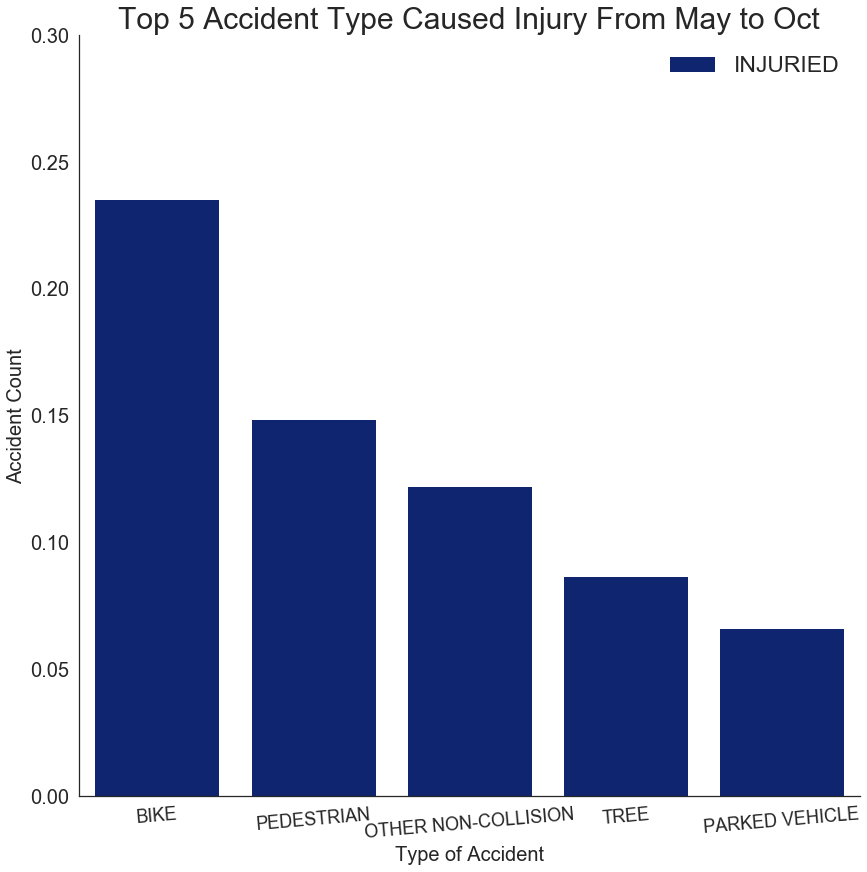

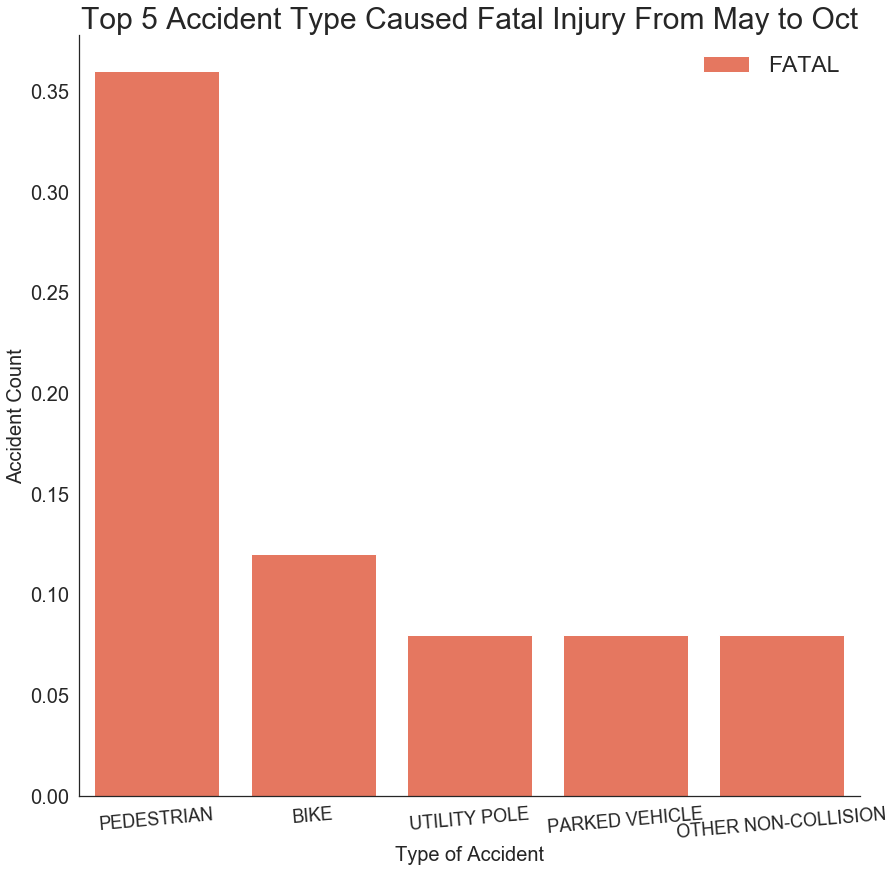

In [9]:
ACCDTYPE_SUMMERINJFLAG = df.groupby(['ACCDTYPE','SUMMERINJFLAG']).count()['DOCTNMBR'].sort_values(ascending=False).head(5).to_frame().reset_index()
ACCDTYPE_SUMMERINJFLAG["DOCTNMBR"] = ACCDTYPE_SUMMERINJFLAG["DOCTNMBR"]/df.groupby(['ACCDTYPE','SUMMERINJFLAG']).count()['DOCTNMBR'].sum()
sns.set(font_scale=1, style = "white")
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.tick_params(axis="y", labelsize = 20)
ACCDTYPE_SUMMERINJFLAG_plot = sns.barplot(x='ACCDTYPE', y='DOCTNMBR', hue='SUMMERINJFLAG', data=ACCDTYPE_SUMMERINJFLAG, palette = 'dark')
ACCDTYPE_SUMMERINJFLAG_leg = ACCDTYPE_SUMMERINJFLAG_plot.get_legend_handles_labels()[0]
ACCDTYPE_SUMMERINJFLAG_plot.legend(ACCDTYPE_SUMMERINJFLAG_leg, ['INJURIED'], title='', frameon = False, fontsize = labelSize - 10)
ACCDTYPE_SUMMERINJFLAG_plot.yaxis.set_ticks(np.arange(0, 0.35, 0.05))
ACCDTYPE_SUMMERINJFLAG_plot.set_xticks(list(range(5)))
ACCDTYPE_SUMMERINJFLAG_plot.set_xticklabels(["BIKE","PEDESTRIAN","OTHER NON-COLLISION", "TREE","PARKED VEHICLE"], fontsize = labelSize - 15, rotation = 5)
ACCDTYPE_SUMMERINJFLAG_plot.spines['top'].set_visible(False)
ACCDTYPE_SUMMERINJFLAG_plot.spines['right'].set_visible(False)

ACCDTYPE_SUMMERINJFLAG_plot.set_title('Top 5 Accident Type Caused Injury From May to Oct', fontsize = 30)
ACCDTYPE_SUMMERINJFLAG_plot.set_xlabel('Type of Accident', fontsize = 20)
ACCDTYPE_SUMMERINJFLAG_plot.set_ylabel('Accident Count', fontsize = 20)
plt.savefig("AccdTypeInj.png")
ACCDTYPE_SUMMERINJFLAG
# BIKE 0.2352
# PED  0.1485
ACCDTYPE_SUMMERFATALFLAG = df.groupby(['ACCDTYPE','SUMMERFATALFLAG']).count()['DOCTNMBR'].sort_values(ascending=False).head(5).to_frame().reset_index()
ACCDTYPE_SUMMERFATALFLAG["DOCTNMBR"] = ACCDTYPE_SUMMERFATALFLAG["DOCTNMBR"]/df.groupby(['ACCDTYPE','SUMMERFATALFLAG']).count()['DOCTNMBR'].sum()
sns.set(font_scale=1, style = "white")
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.tick_params(axis="y", labelsize = 20)
ACCDTYPE_SUMMERFATALFLAG_plot = sns.barplot(x='ACCDTYPE', y='DOCTNMBR', hue='SUMMERFATALFLAG', data=ACCDTYPE_SUMMERFATALFLAG, palette = 'Reds')
ACCDTYPE_SUMMERFATALFLAG_leg = ACCDTYPE_SUMMERFATALFLAG_plot.get_legend_handles_labels()[0]
ACCDTYPE_SUMMERFATALFLAG_plot.legend(ACCDTYPE_SUMMERFATALFLAG_leg, ['FATAL'], title='', frameon = False,fontsize = labelSize - 10)
ACCDTYPE_SUMMERFATALFLAG_plot.set_xticks(list(range(5)))
ACCDTYPE_SUMMERFATALFLAG_plot.set_xticklabels(["PEDESTRIAN","BIKE","UTILITY POLE","PARKED VEHICLE","OTHER NON-COLLISION"], fontsize = labelSize - 15, rotation = 5)
ACCDTYPE_SUMMERFATALFLAG_plot.spines['top'].set_visible(False)
ACCDTYPE_SUMMERFATALFLAG_plot.spines['right'].set_visible(False)

ACCDTYPE_SUMMERFATALFLAG_plot.set_title('Top 5 Accident Type Caused Fatal Injury From May to Oct', fontsize = 30)
ACCDTYPE_SUMMERFATALFLAG_plot.set_xlabel('Type of Accident', fontsize = 20)
ACCDTYPE_SUMMERFATALFLAG_plot.set_ylabel('Accident Count', fontsize = 20)
plt.savefig("AccdTypeFatal.png")


### Takeaway
- From May to Oct
    - **38%** of the injured case involved bycicle and pedestrian.
    - **48%** of the fatal injured case involved bycicle and pedestrian.

### Accident location analysis
- plot the accient by latitude and longtitude to check if there is a clustered area.

In [5]:
import plotly
import plotly.graph_objects as go
import gmplot
plotly.offline.init_notebook_mode(connected = True)
mapbox_access_token = 'pk.eyJ1IjoicnlhbnlhbmciLCJhIjoiY2swaDI5cmt0MDdpeTNkcDhwdDFmMmgwMyJ9.k-gVR4ZYPtS4YVranuGJXA'
#get data with lat and long
LOC_SUMMERINJFLAG = df.groupby(['ACCDTYPE','FLAG','WISLR_LATDECDG','WISLR_LONDECDG']).count()['DOCTNMBR'].to_frame().reset_index()
loc_na_dropped_df = LOC_SUMMERINJFLAG.dropna(subset=['WISLR_LATDECDG', 'WISLR_LONDECDG'])
lat = loc_na_dropped_df['WISLR_LATDECDG']
lon = loc_na_dropped_df['WISLR_LONDECDG']
fig = go.Figure(go.Scattermapbox(lat = lat, lon = lon,
                         mode = 'markers',
                         marker = go.scattermapbox.Marker(size=3,color='rgb(0, 100, 100)'),
                         text = loc_na_dropped_df['FLAG']))
fig.update_layout(title = 'Injuried Accident From May to October',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 43.07, lon = -89.43),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))
plotly.offline.iplot(fig)

### Takeaway
- Most accident took place in the downtown area happened at intersections.
- The most clustered area is around Capital Square.

In [4]:
import gmaps
import gmaps.datasets
gmaps.configure()
#locations = gmaps.datasets.load_dataset("taxi_rides")
markers = gmaps.symbol_layer(
    loc_tuple, fill_color='red', stroke_color='red', scale=2
)
fig = gmaps.figure()
#fig.add_layer(gmaps.heatmap_layer(loc_tuple))
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [119]:
import geopandas as gpd
import shapefile as shp

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
#opening the vector map
shp_path = '/Users/ark.kuo/Project/DS/Vision-Zero-Madison/Neighborhood_Associations/Neighborhood_Associations.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)
len(sf.shapes())

139

In [115]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [116]:
geo_df = read_shapefile(sf)
geo_df

,OBJECTID,NA_ID,NEIGHB_NAM,STATUS,CLASSIFICA,ShapeSTAre,ShapeSTLen,Web,coords
0,8332,1,Allied Dunn's Marsh Neighborhood Association,Active,Neighborhood Association,1.512568e+07,16657.055614,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.44606197723901, 43.034741465964004), (-8..."
1,8333,2,Appalachian Ridge Neighborhood Association,Active,Neighborhood Association,9.918189e+05,3985.709673,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.49120556370883, 43.07518857325085), (-89..."
2,8334,3,Arbor Hills Neighborhood Association,Active,Neighborhood Association,9.987933e+06,14913.568833,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.43010336356618, 43.031658336380175), (-8..."
3,8335,4,Bay Creek Neighborhood Association,Active,Neighborhood Association,1.603760e+07,19820.043890,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.38371406078669, 43.05837413455889), (-89..."
4,8336,5,Bayview Foundation Inc.,Active,Resident Association,3.764334e+05,2605.415004,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.39510625422224, 43.066980864598676), (-8..."
...,...,...,...,...,...,...,...,...,...
134,8466,56,Nakoma League,Inactive,Neighborhood Association,1.094478e+07,18023.889636,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.43886703997987, 43.04708485820699), (-89..."
135,8467,165,Greater Sandburg Neighborhood Association,Active,Neighborhood Association,4.481532e+07,33212.416616,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.32453452009335, 43.11690949268071), (-89..."
136,8468,24,Eastmorland Community Association,Active,Neighborhood Association,3.460758e+07,25477.602525,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.31515324997893, 43.094799175443676), (-8..."
137,8469,114,Schenk-Atwood-Starkweather-Yahara Neighborhood...,Active,Neighborhood Association,2.526434e+07,26539.960543,http://www.cityofmadison.com/neighborhoods/pro...,"[(-89.33091078298743, 43.099171161573736), (-8..."


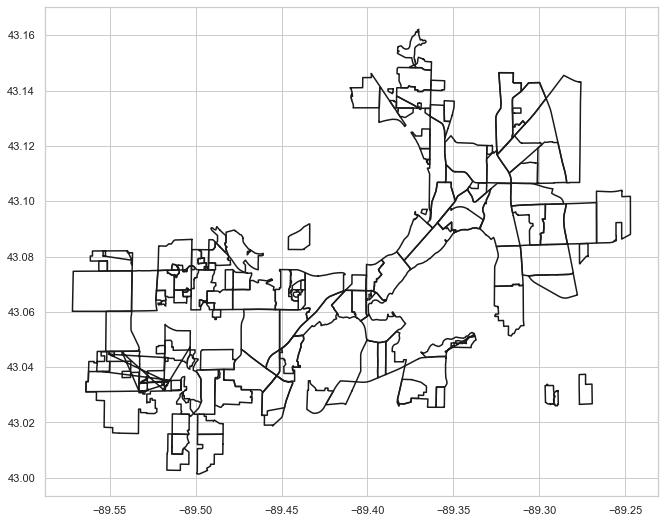

In [117]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [120]:
# set the filepath and load
fp = shp_path
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()


,OBJECTID,NA_ID,NEIGHB_NAM,STATUS,CLASSIFICA,ShapeSTAre,ShapeSTLen,Web,geometry
0,8332,1,Allied Dunn's Marsh Neighborhood Association,Active,Neighborhood Association,1.512568e+07,16657.055614,http://www.cityofmadison.com/neighborhoods/pro...,"POLYGON ((-89.44606 43.03474, -89.44586 43.034..."
1,8333,2,Appalachian Ridge Neighborhood Association,Active,Neighborhood Association,9.918189e+05,3985.709673,http://www.cityofmadison.com/neighborhoods/pro...,"POLYGON ((-89.49121 43.07519, -89.49161 43.075..."
2,8334,3,Arbor Hills Neighborhood Association,Active,Neighborhood Association,9.987933e+06,14913.568833,http://www.cityofmadison.com/neighborhoods/pro...,"POLYGON ((-89.43010 43.03166, -89.43013 43.031..."
3,8335,4,Bay Creek Neighborhood Association,Active,Neighborhood Association,1.603760e+07,19820.043890,http://www.cityofmadison.com/neighborhoods/pro...,"POLYGON ((-89.38371 43.05837, -89.38357 43.058..."
4,8336,5,Bayview Foundation Inc.,Active,Resident Association,3.764334e+05,2605.415004,http://www.cityofmadison.com/neighborhoods/pro...,"POLYGON ((-89.39511 43.06698, -89.39750 43.065..."


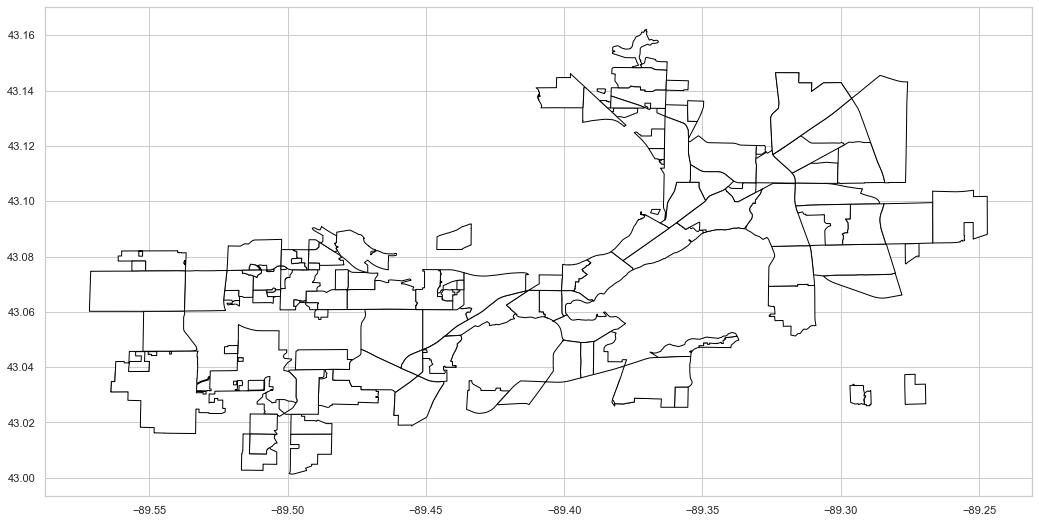

In [127]:
map_df.plot(figsize = (18,9),color='white',edgecolor='black')

In [1]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: OK


In [2]:
from ipyleaflet import Map, Marker, Circle, LayerGroup
def add_marker(m,loc_tuple):
    for loc in loc_tuple:
         marker = Marker(location=loc, draggable=False)
         m.add_layer(marker)

In [7]:
loc_tuple = []
for i in range(len(df)):
  if (df.ACCDSVR[i] == "INJ" or df.ACCDSVR[i] == "FAT"):
    if not np.isnan(df.WISLR_LATDECDG[i]) or not np.isnan(df.WISLR_LONDECDG[i]):
      loc_tuple.append((df.WISLR_LATDECDG[i],df.WISLR_LONDECDG[i]))
len(loc_tuple)

13870

In [9]:
m = Map(center = [43.074013, -89.392540], zoom =12)
layer_group = LayerGroup()
loc_tuple = []
for i in range(len(loc_tuple)):
#     marker = Marker(location=loc_tuple[i], draggable=False)
#     m.add_layer(marker)
    circle = Circle(location=loc_tuple[i], radius=1, color="brown", fill_color="yellow")
    layer_group.add_layer(circle)

m.add_layer(layer_group)
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …